In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# CD to correct folder 
!cd "/content/drive/MyDrive/Colab_Notebooks/Thesis/"

# Initialize path
import sys
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/Thesis/')

In [ ]:
%%capture
# Import general packages
import pandas as pd
import numpy as np

from tabulate import tabulate
from pprint import pprint

# Regex
import re

# NLTK
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

# MatplotLib
import matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

# Sklearn
import sklearn
from sklearn.model_selection import train_test_split

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Load Dataset

In [ ]:
# Define path Data
path = "/content/drive/MyDrive/Colab_Notebooks/Thesis/Data/"
df_euans_total = pd.read_excel(path + 'reviews_per_aspect.xlsx')
df_euans_total.head(3)

,Aspect,Rating,Review,City,Country,Venue
0,Overview,5.0,Dobbies garden center has a large range of ite...,Perth,United Kingdom,https:||www.euansguide.com|venues|dobbies-gard...
1,Transport & Parking,5.0,"There is disabled parking close to the doors, ...",Perth,United Kingdom,https:||www.euansguide.com|venues|dobbies-gard...
2,Access,5.0,There is a lift and there is also a cafe where...,Perth,United Kingdom,https:||www.euansguide.com|venues|dobbies-gard...


# Split Data

In [ ]:
# Shuffle data
df_shuffle = df_euans_total.sample(frac=1)

# Train data (80%)
train_data = df_shuffle[:int(df_shuffle.shape[0]*0.8)]

# Test data (20%)
test_data = df_shuffle[int(df_shuffle.shape[0]*0.8):]

print("Length of train_data should be:", int(df_shuffle.shape[0]*0.8))
print("Length of test_data should be:", int(df_shuffle.shape[0]*0.2))

Length of train_data should be: 68244
Length of test_data should be: 17061


# Cleaning

In [ ]:
# --------- CLEAN DATA ---------
print(color.BOLD + "---> START CLEANING" + color.END)
# Create a copy of the data
df = train_data

# Rename and drop colums
df = df.drop(columns=["City", "Country"])
df = df.rename(columns={"Review": "Text"})

# Drop irrelevant aspects
df = df[df['Aspect']!='Anything else you wish to tell us?']
df = df[df['Aspect']!='Venue Manager responded to this review']       
df = df[df['Aspect']!='COVID Precautions']  
df = df[df['Aspect']!='Accessibility Guide']  
df = df[df['Aspect']!='Awards List'] 
df = df[df['Aspect']!='Access Statement']

# Drop NaN
df = df[df["Text"].notna()]

# Some reviews contain: "A description about the access has not been added for this venue."
# These have a rating <=0.0
# Remove no description reviews
df = df[df["Rating"]>0.0]

# Remove review if sentence count == 0
df["SentenceCount"] = df["Text"].apply(lambda x: len(sent_tokenize(x)))
df = df[df["SentenceCount"]!=0]

# Take only the venue name
df["Venue"] = df["Venue"].apply(lambda x: ' '.join(x.split('|')[4].split("-")[:-1]))

# Rating into Sentiment
df["Sentiment"] = df["Rating"].map(lambda score: 'positive' if score > 3.0 else 'negative')
df['Label'] = df["Sentiment"].map({'positive': 1, 'negative': 0})

print("---> DONE CLEANING")
df.head(3)

---> START CLEANING
---> DONE CLEANING


,Aspect,Rating,Text,Venue,SentenceCount,Sentiment,Label
19269,Toilets,5.0,Wheelchair accessible toilet in Lyndhurst's ca...,new forest national park lymington,2,positive,1
50160,Access,3.0,Access to the coffee shop is through a pull do...,costa coffee inverness,2,negative,0
53561,Transport & Parking,5.0,Ample parking spaces and space. It is a beauti...,leuchie house north berwick,2,positive,1


#EDA

---> START EDA
REVIEWS PER ASPECT:
Metric                                Count
----------------------------------  -------
Total nr. of reviews:               32076
Max nr. of reviews per aspect:       7140
Min nr. of reviews per aspect:       5387
Average nr. of reviews per aspect:   6415.2
SENTENCES PER ASPECT:
Average nr. of sentences per aspect
{'Access': 3.7167723853075674,
 'Overview': 4.445238095238095,
 'Staff': 1.7822100691651923,
 'Toilets': 2.3346946352329683,
 'Transport & Parking': 2.2940637875782084}
SENTENCES PER REVIEW:
Metric                                     Count
------------------------------------  ----------
Total nr. of sentences:               95625
Max nr. of sentences per review:         57
Min nr. of sentences per review:          1
Average nr. of sentences per review:      2.9812
REVIEWS PER VENUE:
Review EDA:
Metric                                  Count
---------------------------------  ----------
Total nr. of reviews:              32076
Max nr. of revi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


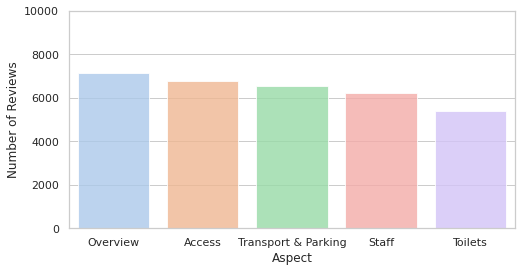

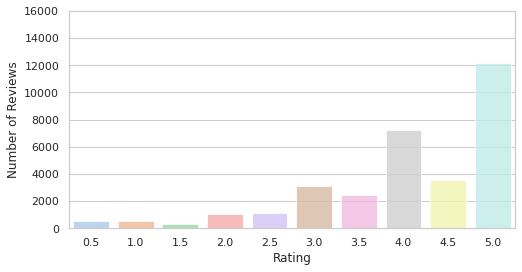

REVIEWS PER SENTIMENT:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


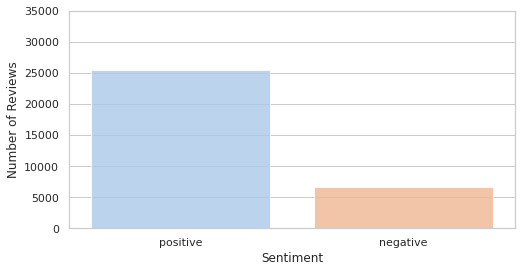

In [ ]:
#----------EDA----------
print(color.BOLD + "---> START EDA" + color.END)

#====================
#=====PER ASPECT=====
#====================
print(color.BOLD + "REVIEWS PER ASPECT:" + color.END)
# Reviews
review_counts = df['Aspect'].value_counts()

review_metrics = [["Total nr. of reviews:", review_counts.sum()], 
                    ["Max nr. of reviews per aspect:", review_counts.max()], 
                    ["Min nr. of reviews per aspect:", review_counts.min()], 
                    ["Average nr. of reviews per aspect:", review_counts.mean()]]
col_names = ["Metric", "Count"]
print(tabulate(review_metrics, headers=col_names))

plt.figure(figsize=(8,4))
sns.barplot(review_counts.index, review_counts.values, alpha=0.8)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Aspect', fontsize=12)
plt.ylim(0, 10000)

# Sentences per aspect
print(color.BOLD + "SENTENCES PER ASPECT:" + color.END)
sentence_counts = dict()
for aspect in df["Aspect"].unique():
    temp = df[df["Aspect"]==aspect]
    sentence_counts[aspect] = temp["SentenceCount"].mean()

print(color.BOLD + "Average nr. of sentences per aspect" + color.END)
pprint(sentence_counts)

# Sentences per review
print(color.BOLD + "SENTENCES PER REVIEW:" + color.END)
sentence_metrics = [["Total nr. of sentences:", df["SentenceCount"].sum()], 
                    ["Max nr. of sentences per review:", df["SentenceCount"].max()], 
                    ["Min nr. of sentences per review:", df["SentenceCount"].min()], 
                    ["Average nr. of sentences per review:", df["SentenceCount"].mean()]]
col_names = ["Metric", "Count"]
print(tabulate(sentence_metrics, headers=col_names))

#====================
#=====PER VENUE=====
#====================
print(color.BOLD + "REVIEWS PER VENUE:" + color.END)
review_count_per_venue = df['Venue'].value_counts()

print(color.BOLD + "Review EDA:" + color.END)
review_metrics_per_venue = [["Total nr. of reviews:", int(review_count_per_venue.sum())], 
                            ["Max nr. of reviews per venue:", review_count_per_venue.max()], 
                            ["Min nr. of reviews per venue:", review_count_per_venue.min()], 
                            ["Average nr. of reviews per venue:", review_count_per_venue.mean()]]
col_names = ["Metric", "Count"]
print(tabulate(review_metrics_per_venue, headers=col_names))

#====================
#=====PER RATING=====
#====================
print(color.BOLD + "REVIEWS PER RATING:" + color.END)
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(8,4))
ax = sns.barplot(rating_counts.index, rating_counts.values, alpha=0.8)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.ylim(0, 16000)
plt.show();

print(color.BOLD + "REVIEWS PER SENTIMENT:" + color.END)
sentiment_count = df['Sentiment'].value_counts()
plt.figure(figsize=(8,4))
ax = sns.barplot(sentiment_count.index, sentiment_count.values, alpha=0.8)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.ylim(0, 35000)
plt.show();

# Save Data

In [ ]:
train_data = df

X = train_data.Text.values
y = train_data.Label.values

# Validation data (10% of Train Data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=2020)

# Save files
train_data.to_csv(path+'train_data.csv')
test_data.to_csv(path+'test_data.csv')
pd.DataFrame(X_train).to_csv(path+'X_train.csv')
pd.DataFrame(X_val).to_csv(path+'X_val.csv')
pd.DataFrame(y_train).to_csv(path+'y_train.csv')
pd.DataFrame(y_val).to_csv(path+'y_val.csv')